# | Barcelona Population Dataset EDA |

##### | TEAM 1 | ###
- Alfaisal Alqahtani.
- Awatef Alshehri.
- Khalid Alharthi.
- Nawaf Alhussain.
- Zahra Alali.

In [58]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
  

In [60]:
#!pip install folium
!pip install plotly

  Using cached https://files.pythonhosted.org/packages/b3/f4/23d4a698db9fe772f7fdf40ac17b743c4b0d80274732c59db5bd45acb3be/plotly-5.5.0-py2.py3-none-any.whl


Could not install packages due to an EnvironmentError: [Errno 28] No space left on device

You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### | Loading Data |


In [23]:
popData = pd.read_csv("data/population.csv")
popData.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


#### - Dictionary
        - Year: 
                The yaer for the record of population group. 
        - District.Code: 
                The district code. 
        - District.Name: 
                The name of the distric for the district code.
        - Neighborhood.Code: 
                The code of the neiborhood that belongs to a specific district.
        - Neighborhood.Name: 
                The name of the neigborhood that goes with the nigborhood code.
        - Gender: 
                The Gender for population gruop. 
                (MALE - FEMALE)
        - Age: 
                The age of the population for the record group. 
                (0-4, 5-9, 10-14 ....)
        - Number: 
                The number of population. 

### | Meta Data| 

In [45]:
# general info about the data and its types
popData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 8 columns):
Year                70080 non-null int64
DistrictCode        70080 non-null int64
DistrictName        70080 non-null object
NeighborhoodCode    70080 non-null int64
NeighborhoodName    70080 non-null object
Gender              70080 non-null object
Population          70080 non-null int64
AgeGroup            70080 non-null object
dtypes: int64(4), object(4)
memory usage: 4.3+ MB


In [46]:
popData.shape

(70080, 8)

In [47]:
popData.DistrictName.unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí'], dtype=object)

### | Cleaning |

- Renameing columns:
    - Remove "." in colmuns names.
    - Renaming the "Number" Columns to "Population".
- Creating sub data sets for each year (2013, 2014, ...).
- Combining the age and adding new columns Age Gruops.

In [24]:
#Renaming columns
 
popData = popData.rename(columns={"District.Code": "DistrictCode","District.Name": "DistrictName","Neighborhood.Code": "NeighborhoodCode", "Neighborhood.Name":"NeighborhoodName", "Number" : "Population" })
popData.head()

,Year,DistrictCode,DistrictName,NeighborhoodCode,NeighborhoodName,Gender,Age,Population
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [26]:
popData.Age.unique()

array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85-89', '90-94', '>=95'], dtype=object)

In [27]:
#function to fix age and combine it into 4 diffrent gruops
def combine_age(x):
    if x == ("0-4" or "5-9"):
        return "Children"
    elif x ==("10-14" or "15-19"):
        return "Adolescence"
    elif x == ("20-24" or "25-29" or "30-34" or "35-39" or "40-44" or "45-49" or "50-54" or "55-59"):
        return "Adult"
    else:
        return "Senior"
   




In [28]:
#applying the function to the data
popData["AgeGroup"] = popData['Age'].apply(combine_age)
popData.sample()

,Year,DistrictCode,DistrictName,NeighborhoodCode,NeighborhoodName,Gender,Age,Population,AgeGroup
42527,2014,7,Horta-Guinardó,42,la Clota,Male,5-9,2,Senior


In [29]:
#dropping the age column
popData.drop("Age", axis=1, inplace=True)
popData.sample()

,Year,DistrictCode,DistrictName,NeighborhoodCode,NeighborhoodName,Gender,Population,AgeGroup
57844,2013,6,Gràcia,29,el Coll,Male,37,Adult


In [30]:
# Creating sub data sets for each year
pop2013 = popData[popData.Year == 2013].reset_index()
pop2014 = popData[popData.Year == 2014].reset_index()
pop2015 = popData[popData.Year == 2015].reset_index()
pop2016 = popData[popData.Year == 2016].reset_index()
pop2017 = popData[popData.Year == 2017].reset_index()

### | Exploring |

#### | Table Visualization | 

In [35]:
# Data grouped by year and the sum of population for each year

popDataYears = (popData.groupby("Year")["Population"].sum()).to_frame().reset_index()
popDataYears

,Year,Population
0,2013,1611822
1,2014,1602386
2,2015,1604555
3,2016,1608746
4,2017,1620809


In [44]:
print("The year with the most population :", + popDataYears.Population.max())
print("The year with the least population :", + popDataYears.Population.min())

The year with the most population : 1620809
The year with the least population : 1602386


In [19]:
# Data grouped by year, gender and the sum of population for each year

(popData.groupby(["Year","Gender"])["Population"].sum()).to_frame()



Population
Year Gender            
2013 Female      848121
     Male        763701
2014 Female      844070
     Male        758316
2015 Female      845035
     Male        759520
2016 Female      847259
     Male        761487
2017 Female      854184
     Male        766625

In [20]:

(popData.groupby(["Year","DistrictName"])["Population"].sum()).to_frame()

Population
Year DistrictName                   
2013 Ciutat Vella             103339
     Eixample                 264780
     Gràcia                   120949
     Horta-Guinardó           167743
     Les Corts                 81640
     Nou Barris               165748
     Sant Andreu              146846
     Sant Martí               232826
     Sants-Montjuïc           182685
     Sarrià-Sant Gervasi      145266
2014 Ciutat Vella             100685
     Eixample                 263565
     Gràcia                   120273
     Horta-Guinardó           166950
     Les Corts                 81200
     Nou Barris               164516
     Sant Andreu              145983
     Sant Martí               232629
     Sants-Montjuïc           180824
     Sarrià-Sant Gervasi      145761
2015 Ciutat Vella             100115
     Eixample                 263558
     Gràcia                   120401
     Horta-Guinardó           166559
     Les Corts                 81530
     Nou Barris               164648
     Sant Andreu              146494
     Sant Martí               233659
     Sants-Montjuïc           180757
     Sarrià-Sant Gervasi      146834
2016 Ciutat Vella             100070
     Eixample                 264305
     Gràcia                   120918
     Horta-Guinardó           167268
     Les Corts                 81642
     Nou Barris               164881
     Sant Andreu              146731
     Sant Martí               233928
     Sants-Montjuïc           180977
     Sarrià-Sant Gervasi      148026
2017 Ciutat Vella             101387
     Eixample                 266416
     Gràcia                   121347
     Horta-Guinardó           168751
     Les Corts                 82033
     Nou Barris               166579
     Sant Andreu              147594
     Sant Martí               235513
     Sants-Montjuïc           181910
     Sarrià-Sant Gervasi      149279

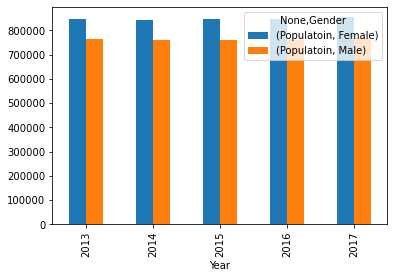

In [135]:
gender_column = pop_gender_year['Gender']
pop_gender_year.groupby(["Year", gender_column]).sum().unstack(level=1).plot(kind='bar');



#### | Charts Visulaization |

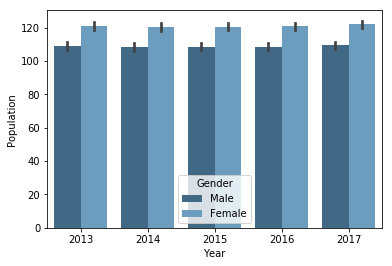

In [48]:
sns.barplot(x="Year", y="Population", hue="Gender", data=popData, palette="Blues_d");

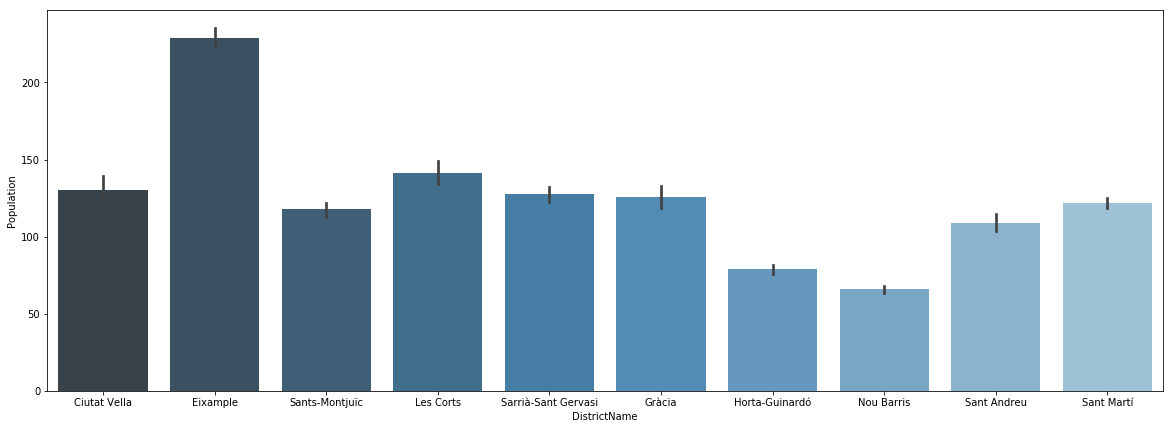

In [54]:
fig_dims = (20, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "DistrictName", y = "Population", ax=ax, data=pop2015, palette="Blues_d")



In [61]:
pop2013.groupby(["DistrictName"]).


,index,Year,DistrictCode,DistrictName,NeighborhoodCode,NeighborhoodName,Gender,Population,AgeGroup
0,56064,2013,1,Ciutat Vella,1,el Raval,Male,227,Children
1,56065,2013,1,Ciutat Vella,2,el Barri Gòtic,Male,49,Children
2,56066,2013,1,Ciutat Vella,3,la Barceloneta,Male,50,Children
3,56067,2013,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,78,Children
4,56068,2013,2,Eixample,5,el Fort Pienc,Male,120,Children
5,56069,2013,2,Eixample,6,la Sagrada Família,Male,221,Children
6,56070,2013,2,Eixample,7,la Dreta de l'Eixample,Male,165,Children
7,56071,2013,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Male,125,Children
8,56072,2013,2,Eixample,9,la Nova Esquerra de l'Eixample,Male,200,Children
9,56073,2013,2,Eixample,10,Sant Antoni,Male,149,Children


In [ ]:
# We add the link which contains the GeoJson file
COR_Geo = "https://raw.githubusercontent.com/martgnz/bcn-geodata/master/districtes/districtes.geojson"
# We call folium’s library to build a map
pop_map = folium.Map(location=[41.39, 2.17], zoom_start=12) # in location we must add the city’s coordinates
# Now we can build our choropleth map by calling the .choropleth method
pop_map.choropleth(geo_data=COR_Geo, # GeoJson Coordinates
                   data= MF_Number_2013 ,   # The table which contains the values we are analysing
                   columns=["District_Name", "Number"],
                   key_on="feature.properties.NOM", # We chose the key we need in the GeoJson file
                   fill_color="YlOrRd",
                   fill_opacity=0.7,
                   line_opacity=0.4,
                   legend_name="Population in Each District in 2013")